In [1]:
import os
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import scvi
import scanpy as sc
import squidpy as sq
import tangram as tg
import cellcharter as cc
import matplotlib.pyplot as plt
import matplotlib.colors as col
%matplotlib inline

#Set working directory
os.chdir("../")

Global seed set to 0


In [2]:
adata = sc.read_h5ad('GBMOrganoid/Checkpoints/xenium_txps.h5ad')
adata.uns['spatial'] = {s: {} for s in adata.obs['sample'].unique()}
adata

AnnData object with n_obs × n_vars = 177816 × 266
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample', 'condition', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', '_scvi_batch', '_scvi_labels', 'cluster_cellcharter'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'spatial', 'spatial_neighbors'
    obsm: 'X_cellcharter', 'X_scVI', 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

# Fig 4d - Spatial clusters 

In [3]:
colpal_clusters = ['#CC79A7','#E69F00','#56B4E9','#009E73','#D55E00','#F0E442']
my_colors2 = col.ListedColormap(sns.color_palette(colpal_clusters))

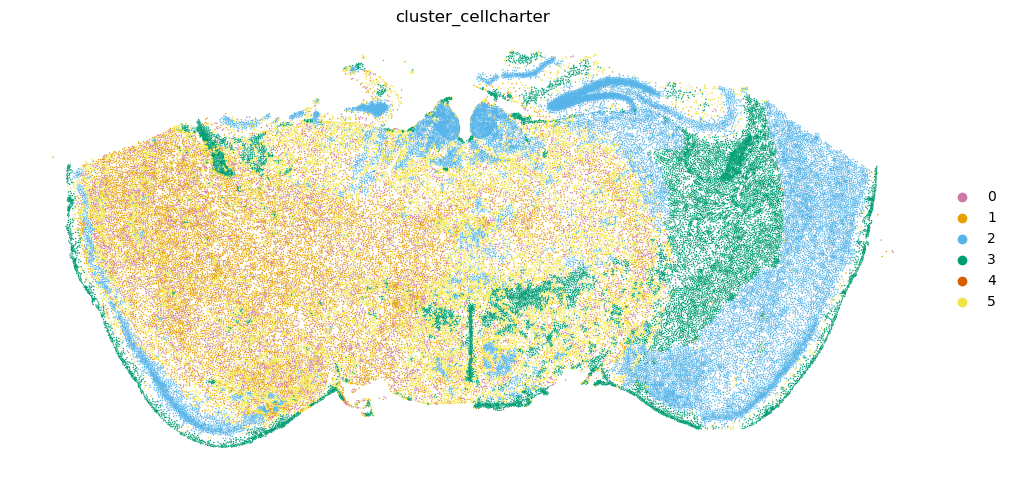

In [4]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=8, 
    img=None,
    spatial_key='spatial',
    palette=my_colors2,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['TXP_O5-WT'],
    frameon=False,title=None,
)

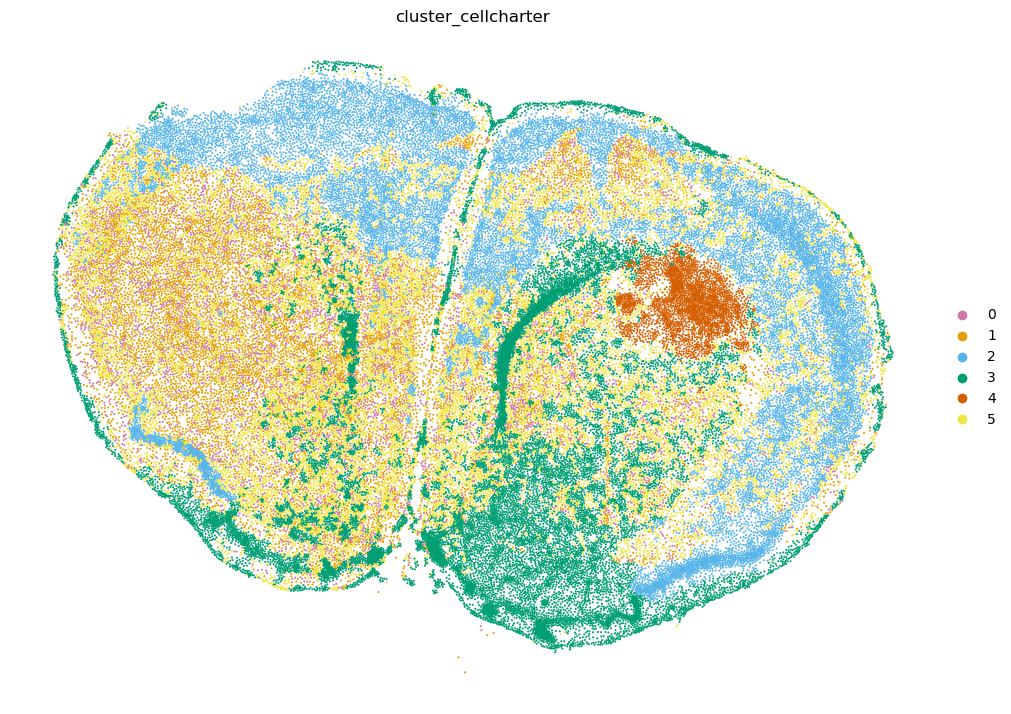

In [5]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=8, 
    img=None,
    spatial_key='spatial',
    palette=my_colors2,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['TXP_O11-PRO'],
    frameon=False,title=None,
)

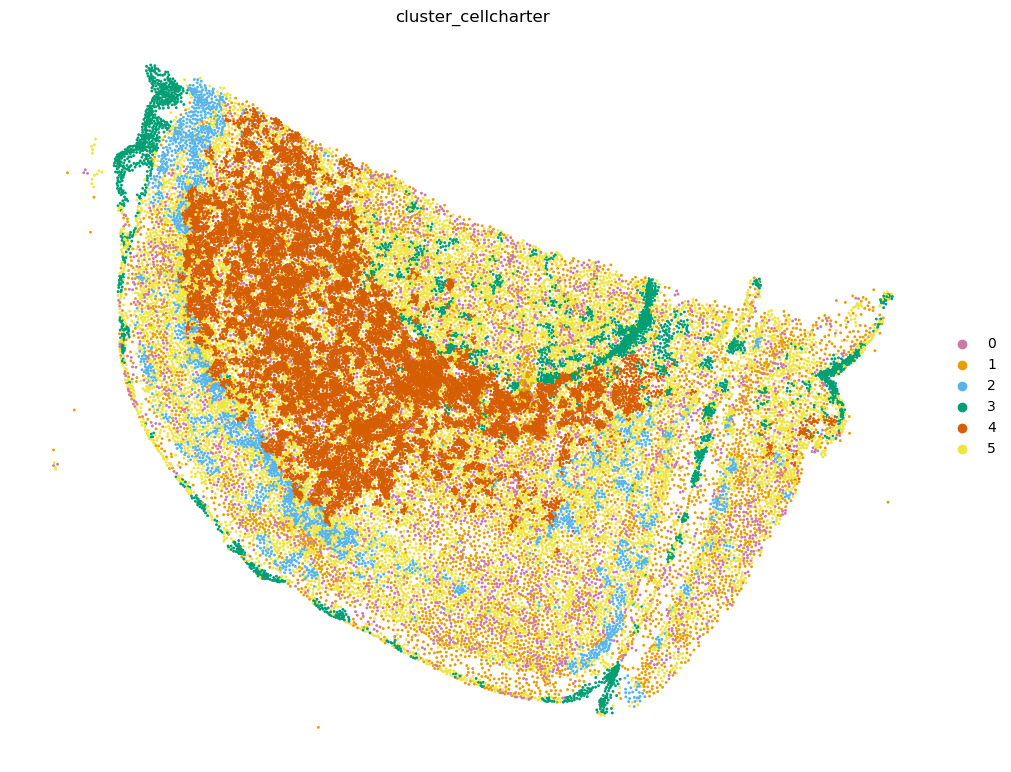

In [6]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=8, 
    img=None,
    spatial_key='spatial',
    palette=my_colors2,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['TXP_O8-MES-1'],
    frameon=False,title=None,
)

# Fig 4e - Bar Spatial Clusters

In [7]:
bar_cols = ['#CC79A7','#E69F00','#56B4E9','#009E73','#D55E00','#F0E442']

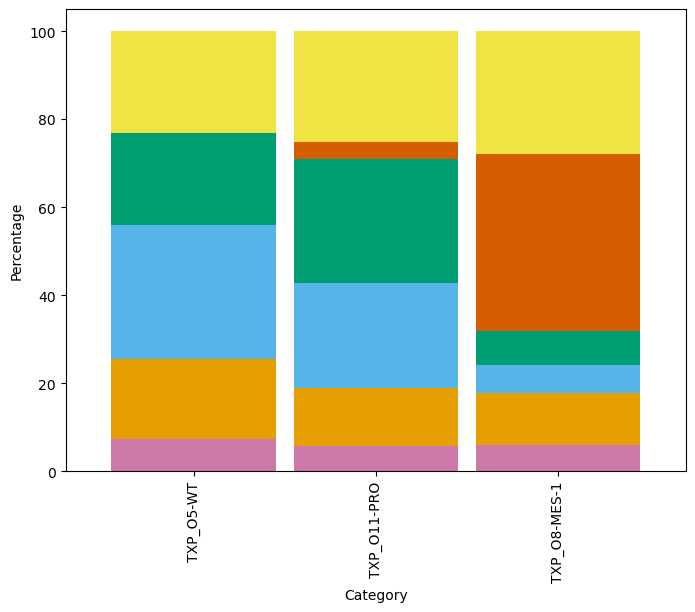

In [8]:
cross_tab = pd.crosstab(adata.obs['sample'],adata.obs['cluster_cellcharter'], normalize='index')*100

order = ["TXP_O5-WT","TXP_O11-PRO","TXP_O8-MES-1"]
ax = cross_tab.loc[order].plot(kind='bar', stacked=True, figsize=(8, 6), color=bar_cols, width=0.9)
ax.get_legend().remove()
# Add labels to the bars
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
# Set labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.rcParams['figure.figsize'] = [10, 10]

# Gene Expression

In [ ]:
# CUX2 = L2-3 IT
# RORB = l4 IT

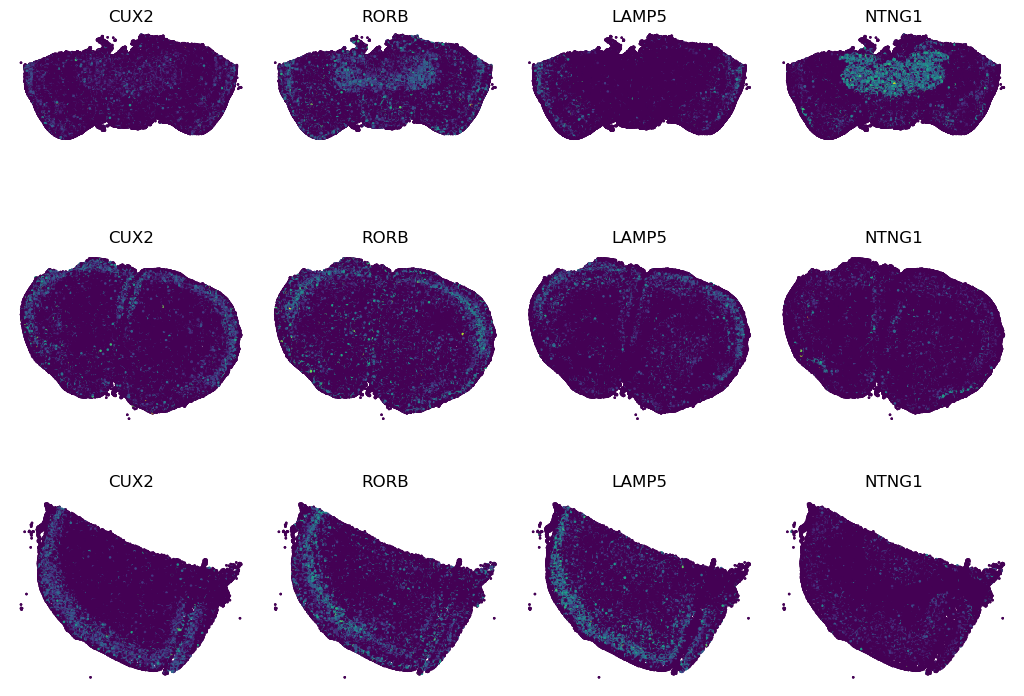

In [23]:
sq.pl.spatial_scatter(
    adata,
    library_key="sample",
    spatial_key='spatial',
    color=["CUX2","RORB","LAMP5","NTNG1"], #L2-3 IT
    library_id=["TXP_O5-WT","TXP_O11-PRO","TXP_O8-MES-1"],
    shape=None,
    size=3,
    img=False,
    ncols=4,
    figsize=(3,3),
    wspace=0.05,hspace=0.01,
    frameon=False,
    library_first=True,
    colorbar=False
)

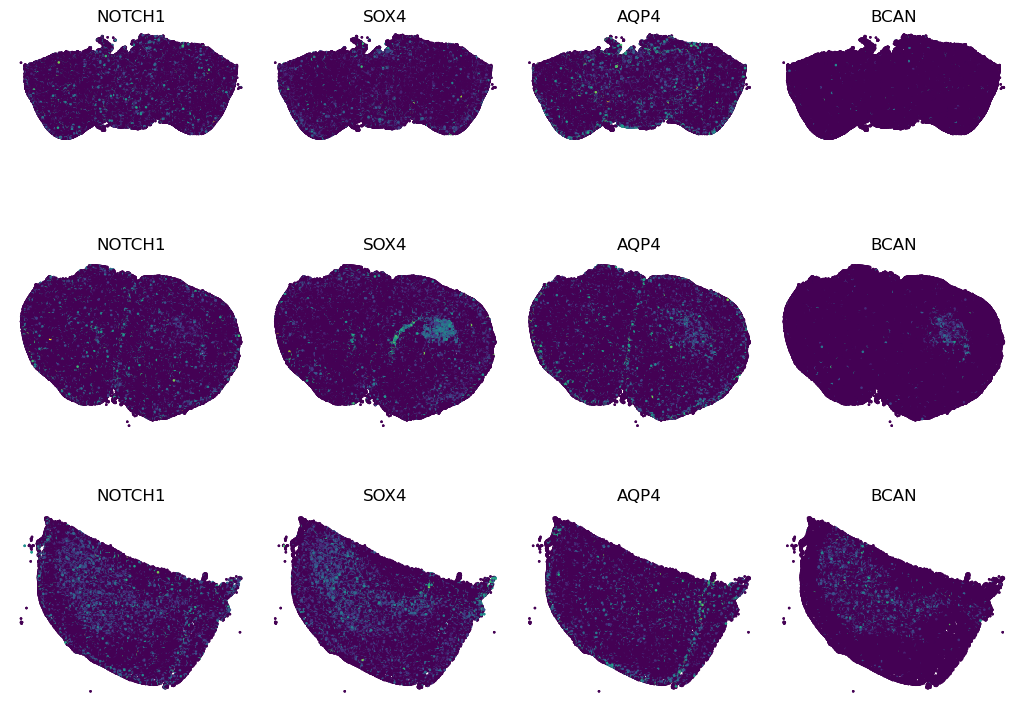

In [28]:
sq.pl.spatial_scatter(
    adata,
    library_key="sample",
    spatial_key='spatial',
    color=["NOTCH1","SOX4","AQP4","BCAN"], 
    library_id=["TXP_O5-WT","TXP_O11-PRO","TXP_O8-MES-1"],
    shape=None,
    size=3,
    img=False,
    ncols=4,
    figsize=(3,3),
    wspace=0.05,hspace=0.1,
    frameon=False,
    library_first=True,
    colorbar=False
)